<h1 style="font-family: 'MiFuente'; font-size: 40px; color: #8A2BE2;">Red neuronal convolucional</h1>


<h1 style="font-family: 'MiFuente'; font-size: 25px; color: #f9bf76;">Importar librerias y paquetes necesarios</h1>

In [11]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow.keras as keras
from skimage import io, transform, color
import matplotlib.pyplot as plt
import os

<h1 style="font-family: 'MiFuente'; font-size: 25px; color: #f9bf76;">Preprocesamiento de los datos</h1>

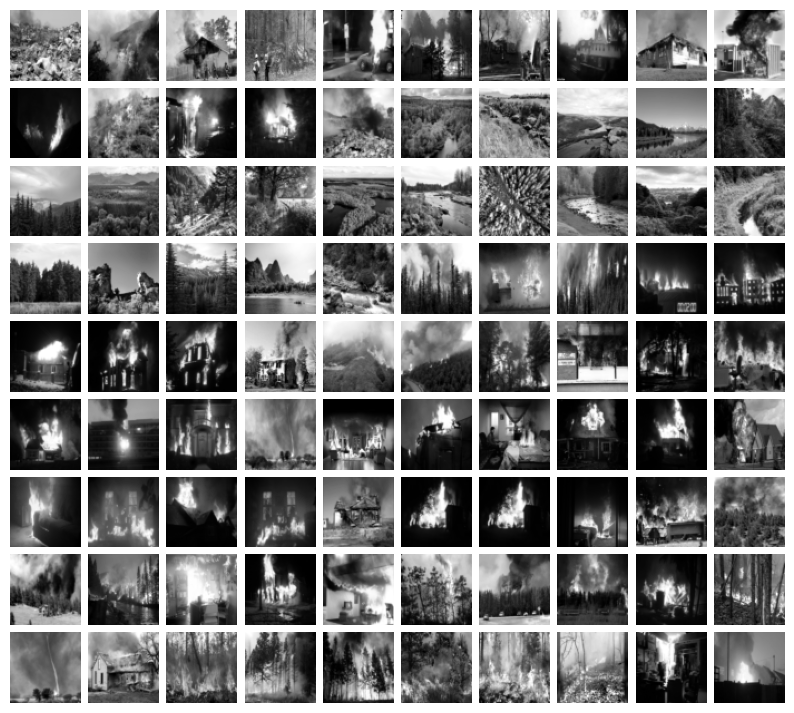

In [12]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder, filename))
        if img is not None:
            if img.shape[2] == 4:
                img = img[:, :, :3]  # Conservar solo los canales RGB
            intensity = np.mean(img[:,:,1]) # Calcular la intensidad de color diferente al naranja en la imagen
            if intensity > 100: # Si la intensidad del color es alta, se asume que no hay fuego
                labels.append(0)  # Etiqueta 0 para no fuego
            else:
                labels.append(1)  # Etiqueta 1 para fuego
            img = color.rgb2gray(img) # Convertir la imagen a escala de grises
            img = img / 255.0 # Normalizar los valores de los píxeles al rango [0, 1]
            img = transform.resize(img, (64, 64)) # Redimensionar las imágenes a 64x64 píxeles
            images.append(img)
    return np.array(images), np.array(labels)

# Cargar las imágenes de entrenamiento y sus etiquetas
train_images, train_labels = load_images_from_folder('Fire images')

# Cargar las imágenes de validación y sus etiquetas
validation_images, validation_labels = load_images_from_folder('Fire images')

# Calcular el número de imágenes y el número de filas y columnas para la cuadrícula de subtramas
num_images = len(train_images)
num_rows = int(np.sqrt(num_images))
num_cols = num_images // num_rows + (num_images % num_rows > 0)

# Crear una figura con un tamaño específico
plt.figure(figsize=(num_cols, num_rows))

# Mostrar todas las imágenes
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.axis('off')

# Ajustar el espacio entre las subtramas
plt.subplots_adjust(wspace=0.1, hspace=0.1)

plt.show()

<h1 style="font-family: 'MiFuente'; font-size: 25px; color: #f9bf76;">Creación del modelo</h1>

In [14]:
# Definir el modelo
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<h1 style="font-family: 'MiFuente'; font-size: 25px; color: #f9bf76;">Entrenamiento del modelo</h1>

Epoch 1/20
1/1 [==============================] - 0s 301ms/step - loss: 0.6629 - accuracy: 0.6222 - val_loss: 0.6628 - val_accuracy: 0.6222
Epoch 2/20
1/1 [==============================] - 0s 219ms/step - loss: 0.6628 - accuracy: 0.6222 - val_loss: 0.6630 - val_accuracy: 0.6222
Epoch 3/20
1/1 [==============================] - 0s 237ms/step - loss: 0.6630 - accuracy: 0.6222 - val_loss: 0.6633 - val_accuracy: 0.6222
Epoch 4/20
1/1 [==============================] - 0s 253ms/step - loss: 0.6633 - accuracy: 0.6222 - val_loss: 0.6634 - val_accuracy: 0.6222
Epoch 5/20
1/1 [==============================] - 0s 232ms/step - loss: 0.6634 - accuracy: 0.6222 - val_loss: 0.6632 - val_accuracy: 0.6222
Epoch 6/20
1/1 [==============================] - 0s 236ms/step - loss: 0.6632 - accuracy: 0.6222 - val_loss: 0.6629 - val_accuracy: 0.6222
Epoch 7/20
1/1 [==============================] - 0s 223ms/step - loss: 0.6629 - accuracy: 0.6222 - val_loss: 0.6626 - val_accuracy: 0.6222
Epoch 8/20
1/1 [====

C:\Users\Usuario\AppData\Local\Temp\ipykernel_23412\1711784415.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'b-', label='Training Loss', color="#f9bf76")
C:\Users\Usuario\AppData\Local\Temp\ipykernel_23412\1711784415.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'r-', label='Validation Loss', color = "#8A2BE2")


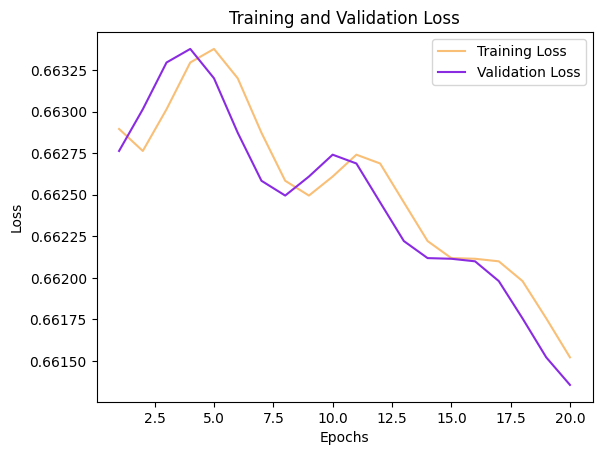

In [17]:
# Entrenar el modelo y guardar el historial
history = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=20, batch_size=128)

# Obtener los valores de pérdida de entrenamiento y validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Graficar las curvas de pérdida
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b-', label='Training Loss', color="#f9bf76")
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', color = "#8A2BE2")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h1 style="font-family: 'MiFuente'; font-size: 25px; color: #f9bf76;">Verficación del modelo con imagenes de prueba</h1>

In [16]:
# Cargar las imágenes de prueba y sus etiquetas
test_images, test_labels = load_images_from_folder('Test images')

# Asegurarse de que las imágenes de prueba tengan la forma (64, 64, 1)
test_images = np.expand_dims(test_images, axis=-1)

# Hacer predicciones para todas las imágenes de prueba
predictions = model.predict(test_images)

# Interpretar las predicciones e imprimir los resultados
for i in range(len(predictions)):
    if test_labels[i] == 1:
        print(f"Imagen {i+1}: Contiene fuego. Etiqueta predicha: {test_labels[i]}")
    else:
        print(f"Imagen {i+1}: No contiene fuego. Etiqueta predicha: {test_labels[i]}")

1/1 [==============================] - 0s 74ms/step
Imagen 1: Contiene fuego. Etiqueta predicha: 1
Imagen 2: Contiene fuego. Etiqueta predicha: 1
Imagen 3: Contiene fuego. Etiqueta predicha: 1
Imagen 4: Contiene fuego. Etiqueta predicha: 1
Imagen 5: Contiene fuego. Etiqueta predicha: 1
Imagen 6: Contiene fuego. Etiqueta predicha: 1
Imagen 7: No contiene fuego. Etiqueta predicha: 0
Imagen 8: No contiene fuego. Etiqueta predicha: 0
Imagen 9: No contiene fuego. Etiqueta predicha: 0
Imagen 10: No contiene fuego. Etiqueta predicha: 0
Imagen 11: No contiene fuego. Etiqueta predicha: 0
Imagen 12: No contiene fuego. Etiqueta predicha: 0
Imagen 13: No contiene fuego. Etiqueta predicha: 0
Imagen 14: No contiene fuego. Etiqueta predicha: 0
Imagen 15: No contiene fuego. Etiqueta predicha: 0
Imagen 16: Contiene fuego. Etiqueta predicha: 1
Imagen 17: Contiene fuego. Etiqueta predicha: 1
